## KMeans

In [1]:
import sys
sys.path.insert(1, '/home/eatitall_scripts')
sys.path.insert(1, '/home/root/pctobs/lib/python3.8/site-packages')
import pandas as pd
from extraccion_informacion.clustering import clustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from extraccion_informacion.estadistica import estadistica


In [2]:
# Cargamos el archivo CSV
csv_path='./../../archivos/datos_con_10_ejemplos_reglas_y_extraccion_entidades_v2.csv'
df = pd.read_csv(csv_path)

In [3]:
# Seleccionamos el dataframe
df_seleccionado=clustering.select_dataset(df,template='compact')
df_seleccionado

/home/eatitall_scripts/extraccion_informacion/clustering/clustering.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compacto[nombre_nueva_var][j]=df[nombre_var_v1][j]+df[nombre_var_v2][j]
/home/eatitall_scripts/extraccion_informacion/clustering/clustering.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compacto[nombre_nueva_var][j]=df[nombre_var_v1][j]+df[nombre_var_v2][j]
/home/eatitall_scripts/extraccion_informacion/clustering/clustering.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Unnamed: 0 record_id  prevencion  sexo       f_nac  edad        f_dm  \
0           1        56         1.0     1  1952-01-20  71.0  2002-01-20   
1           2       213         1.0     1  1960-06-08  63.0  2011-06-08   
2           3    139-95         1.0     0  1947-09-24  75.0  2013-06-15   
3           4    143-14         1.0     0  1985-05-31  37.0  2012-03-06   
4           5    143-17         1.0     0  1966-12-10  56.0  2000-03-09   
5           6     143-3         0.0     0  1967-03-03  56.0  2016-03-01   
6           7       212         1.0     1  1958-06-11  65.0  1987-06-17   
7           8     99-32         0.0     1  1952-01-01  71.0  1997-01-01   
8           9     143-5         1.0     0  1983-11-22  39.0  2021-11-02   
9          10     97-43         1.0     1  1968-09-13  54.0  2010-04-22   

   evoldm  cisq  ins_cardiaca  ...  pc_prueba de funcion renal  \
0    20.0     0           0.0  ...                           0   
1    11.0     0           0.0  ...                           0   
2     8.0     0           0.0  ...                           0   
3    10.0     0           0.0  ...                           0   
4    22.0     0           0.0  ...                           0   
5     5.0     0           NaN  ...                           0   
6    35.0     0           0.0  ...                           0   
7    25.0     1           1.0  ...                           0   
8     0.0     0           NaN  ...                           0   
9    11.0     0           NaN  ...                           0   

   pc_monitoreo continuo de glucosa (mcg)  pc_prueba de pie diabetico  \
0                                       0                           0   
1                                       0                           0   
2                                       0                           0   
3                                       0                           0   
4                                       0                           0   
5                                       0                           0   
6                                       0                           0   
7                                       0                           0   
8                                       0                           0   
9                                       0                           0   

   pc_electrocardiograma (ecg)  pc_velocidad de sedimentacion globular (vsg)  \
0                            0                                             0   
1                            0                                             0   
2                            0                                             0   
3                            0                                             0   
4                            0                                             0   
5                            0                                             0   
6                            0                                             0   
7                            0                                             0   
8                            0                                             0   
9                            0                                             0   

   pc_prueba de tiroides pc_hemograma completo  pc_prueba de vitamina b12  \
0                      0                     0                          0   
1                      0                     0                          0   
2                      0                     0                          0   
3                      0                     0                          0   
4                      0                     0                          0   
5                      0                     0                          0   
6                      0                     0                          0   
7                      0                     0                          0   
8                      0                     0                          

In [6]:
df_seleccionado=clustering.replace_nan_values(df_seleccionado)

Hay valores NaN en el DataFrame.

Número de NaN por columna:
ins_cardiaca         3
ldl                  1
tg                   1
cac                  4
inferior_cac         3
                    ..
hba1cpeso12mejor    10
HbA1c1257           10
HbA1c1265           10
HbA1c127            10
imc                  1
Length: 264, dtype: int64

Columnas que contienen NaNs: ['ins_cardiaca', 'ldl', 'tg', 'cac', 'inferior_cac', 'prot', 'plaquetas', 'got', 'gpt', 'fib4', 'talla', 'peso', 'tas', 'tad', 't_glp1', 't_insulina', 's_insulina', 't_isglt2', 't_hipolipemiante', 'o_hipolipemiante', 'c_hipolipemiante', 'c_tto_hipo', 'imci', 'isglt2_b', 'insulina_b', 'estatina_b', 'peso_3_6meses', 'f_visita_3_6meses', 's_tto_3_6meses', 'motivo_3_6meses', 'motivo_s_3_6meses', 'dosis_3_6meses', 'hba1c_3_6meses', 'cac_3_6meses', 'inferior_cac_3_6meses', 'prot_3_6meses', 'fg_3_6meses', 'supera_fg_3_6meses', 'ldl_3_6meses', 'tg_3_6meses', 'plaquetas_3_6meses', 'got_3_6meses', 'gpt_3_6meses', 'fib4_3_6meses', 'p

In [7]:
df_seleccionado=clustering.manage_string_values(df_seleccionado)

Se han eliminado las siguientes columnas:  ['record_id', 'f_nac', 'f_dm', 'f_inicio', 'o_hipolipemiante', 'f_visita_3_6meses', 'motivo_s_3_6meses', 'f_mace_d_3_6meses', 'f_muerte_diferido_3_6meses', 'observaciones_v1', 'observaciones_v2']


In [8]:
df_seleccionado.to_csv('df_compact.csv',index=False)

In [9]:
for k in range(0,len(df_seleccionado.iloc[0])):
    nombre_var=df_seleccionado.columns[k]
    if all(df_seleccionado[nombre_var]==0)==False:
        #Añadir columna con la nueva variable en el df HCE. Añadir también su valor
        if nombre_var[:3]=='al_':
            print(nombre_var)

al_kefir
al_aceite de oliva
al_arroces
al_avena
al_muesli
al_pan integral
al_tofu
al_bayas
al_naranja
al_carbohidratos
al_hc
al_hidratos de carbono
al_azucares simples
al_proteinas
al_grasas
al_pescado
al_cereales
al_legumbres
al_frutos secos
al_verduras
al_frutas
al_azucar
al_vegetales
al_potasio
al_antioxidantes


## Clustering

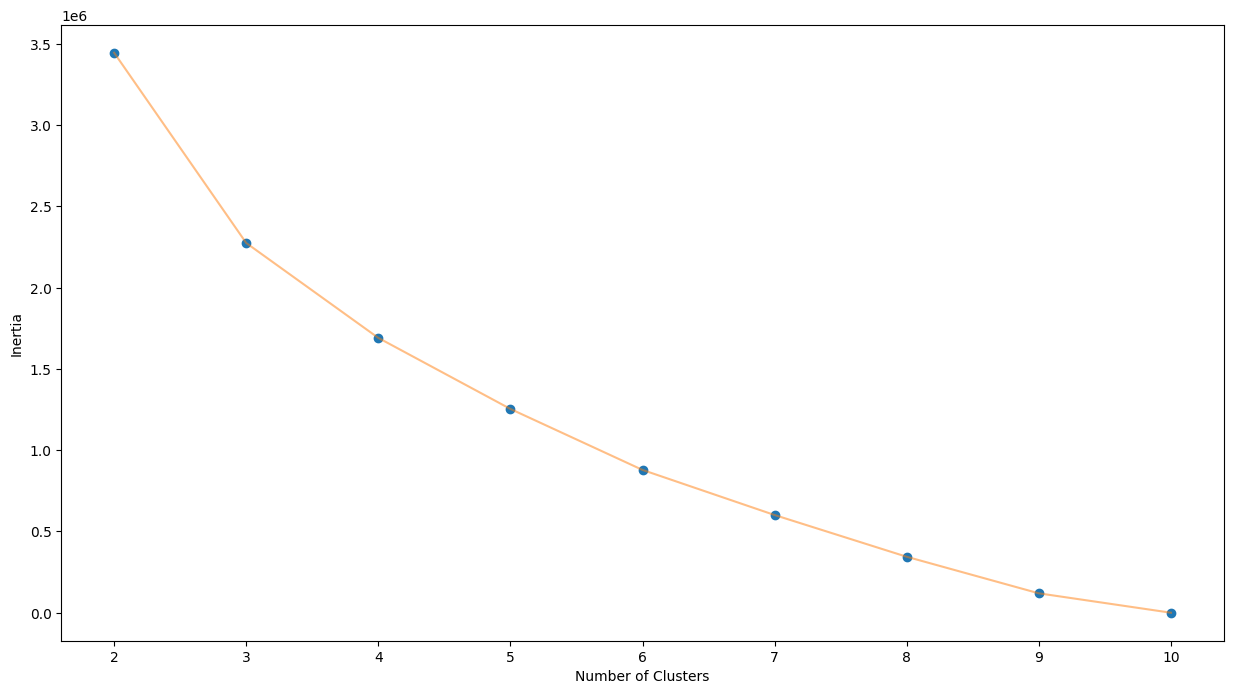

In [10]:
inertia=clustering.inertia_of_kmeans(df_seleccionado,maxClusters=11,n_clusters=5,init='k-means++',n_init = 10,max_iter=500,tol=0.0001,random_state= 111,algorithm='elkan')

### Aplicamos el algoritmo de Clustering

In [12]:
labels,centroids=clustering.kmeans_algorithm(df_seleccionado,n_clusters=4,init='k-means++',n_init = 10,max_iter=500,tol=0.0001,random_state= 111,algorithm='elkan')

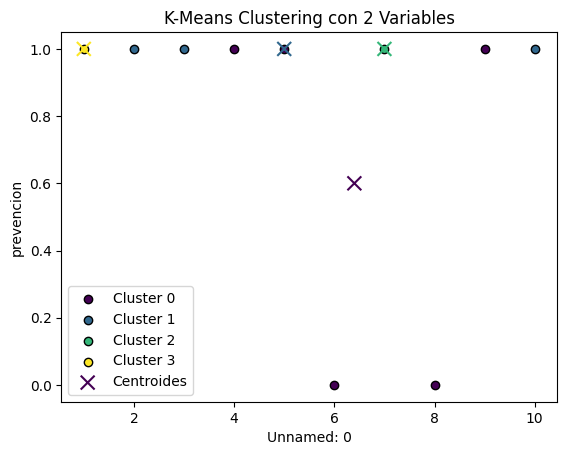

In [13]:
clustering.plot_clusters(df_seleccionado,centroids,labels,0,1)

In [14]:
score = silhouette_score(df_seleccionado,labels)
score

0.19227475935501026

In [15]:
centroid_dictionary=clustering.centroid_dictionary(df_seleccionado,centroids,labels)
centroid_dictionary

{'cluster0': {'nun. paceintes': 5,
  'imc': {'valor': {'valor': 40.30213298594131},
   'desv_est': 6.53561002298683,
   'dist promedio': 14.614068285827516,
   'dist promedio resto clusters': 141.4439750027088},
  'tas': {'valor': {'valor': 43.0},
   'desv_est': 117.2006825918689,
   'dist promedio': 262.0686932847951,
   'dist promedio resto clusters': 302.00165562460086},
  'tad': {'valor': {'valor': 15.400000000000006},
   'desv_est': 94.258368328759,
   'dist promedio': 210.76811903131838,
   'dist promedio resto clusters': 241.9491682151439},
  'tg': {'valor': {'valor': 201.8},
   'desv_est': 43.52194848579277,
   'dist promedio': 97.31803532747668,
   'dist promedio resto clusters': 321.084101132398},
  'hba1c': {'valor': {'valor': 8.08},
   'desv_est': 1.345213737664019,
   'dist promedio': 3.007989361683316,
   'dist promedio resto clusters': 5.632938842203064},
  'fg': {'valor': {'valor': 80.0},
   'desv_est': 17.158088471621774,
   'dist promedio': 38.36665218650175,
   'dist

In [16]:
df_corrs,correlaciones_ordenadas_df=estadistica.encontrar_N_variables_mas_correlacionadas_y_correlaciones(df_seleccionado, 20, 1)
correlaciones_ordenadas_df

Variable1             Variable2  Correlacion
0                cac300_24_36meses           far_glucosa     1.000000
1                        endovscar                  endo     1.000000
2                             imci                   imc     1.000000
3                  fg_30_6_12meses                 talla     0.999996
4                  al_pan integral                 talla     0.999996
5                             fib4           fib4basalF2     0.999994
6                         insulina    supera_fg_3_6meses     0.999984
7                        ppeso1036            peso3mejor     0.999984
8   clculos_3_6meses_auto_complete  t_rybelsus_3_6_meses     0.999984
9                    CACmas30basal        CACmas300basal     0.999983
10                 fib4_3_6mesesF2      fib4_3_6mesesF34     0.999980
11                       chab1c136      fib4_3_6mesesF34     0.999980
12                        ppeso536            peso3mejor     0.999976
13                 c_tad_3_6_meses       c_tas_3_6_meses     0.999976
14                        ppeso536             ppeso1036     0.999976
15               c_hba1c_3_6_meses      fib4_3_6mesesF34     0.999969
16                       chab1c136      fib4_3_6mesesF01     0.999966
17                       chab1c136            hba1cmejor     0.999966
18                    fib4basalF01           evoldmmas10     0.999966
19                       chab1c136                hba1c7     0.999966
20                     evoldmmas10           fib4basalF2     0.999966
21                    fib4basalF34                  fib4     0.999966
22                            fib4           evoldmmas10     0.999966
23                       chab1c136     c_hba1c_3_6_meses     0.999963
24                 fib4_3_6mesesF2         fib4_3_6meses     0.999961
25                         hba1c65            hba1cmejor     0.999960
26                          hba1c7      fib4_3_6mesesF01     0.999960
27              supera_fg_3_6meses            s_insulina     0.999959
28                      hba1cmejor      fib4_3_6mesesF01     0.999953
29                         hba1c65      fib4_3_6mesesF34     0.999953
30                    ins_cardiaca          inferior_cac     0.999953
31                    tg_6_12meses                 imc30     0.999951
32                           imc30      cac30_24_36meses     0.999951
33                           imc30            imc27medio     0.999951
34                  s_tto_3_6meses     estatina_3_6meses     0.999951
35               estatina_3_6meses   persitencia3_6meses     0.999951
36               c_hba1c_3_6_meses       fib4_3_6mesesF2     0.999939
37                   fib4_3_6meses      fib4_3_6mesesF34     0.999933
38                         hba1c65       fib4_3_6mesesF2     0.999932
39                         hba1c65     c_hba1c_3_6_meses     0.999931

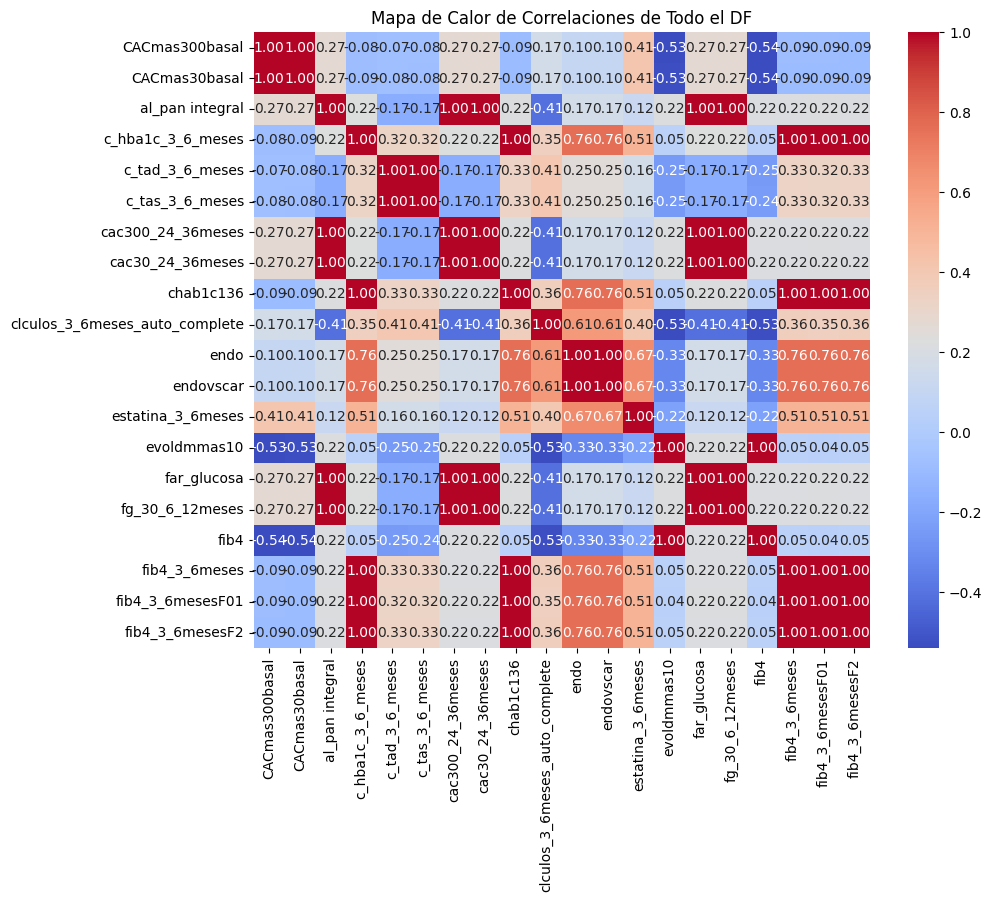

In [17]:
estadistica.visualizar_correlaciones(df_corrs, titulo=' de Todo el DF')

In [18]:
#  estadistica.correlacion_conjunto_de_vars_con_el_df(df_seleccionado,'personalizado',['sexo','edad','acv'])
df_alimentos=estadistica.correlacion_conjunto_de_vars_con_el_df(df_seleccionado,'alimento')
df_alimentos


nombre_var  Unnamed: 0  prevencion          sexo      edad  \
0                al_kefir    0.522233    0.166667  3.333333e-01 -0.126986   
0      al_aceite de oliva    0.058026   -0.666667 -3.333333e-01 -0.072949   
0              al_arroces   -0.522233    0.166667  3.333333e-01  0.332324   
0                al_avena   -0.522233    0.166667  3.333333e-01  0.332324   
0               al_muesli   -0.522233    0.166667  3.333333e-01  0.332324   
0         al_pan integral   -0.522233    0.166667  3.333333e-01  0.332324   
0                 al_tofu    0.406181    0.166667 -3.333333e-01 -0.532259   
0                al_bayas    0.522233    0.166667  3.333333e-01 -0.126986   
0              al_naranja    0.290129   -0.666667  3.333333e-01  0.332324   
0        al_carbohidratos   -0.625286    0.234261  1.561738e-01  0.517738   
0                   al_hc   -0.261116    0.250000 -5.000000e-01  0.275586   
0  al_hidratos de carbono   -0.290129    0.166667 -3.333333e-01  0.440397   
0     al_azucares simples   -0.299050    0.234261 -4.685213e-01  0.378493   
0            al_proteinas    0.314918   -0.075378 -6.030227e-01 -0.779602   
0               al_grasas   -0.356753    0.243975  4.879500e-01  0.391552   
0              al_pescado    0.462168    0.234261 -1.561738e-01 -0.419000   
0             al_cereales   -0.462168   -0.156174  1.561738e-01  0.277224   
0            al_legumbres    0.407795   -0.156174 -4.685213e-01 -0.532928   
0         al_frutos secos    0.052486   -0.452267 -3.347448e-17  0.026883   
0             al_verduras   -0.043519   -0.562500  2.500000e-01  0.271533   
0               al_frutas    0.213201   -0.612372  4.082483e-01  0.284578   
0               al_azucar   -0.522233    0.166667  3.333333e-01  0.332324   
0            al_vegetales    0.213201   -0.612372  0.000000e+00 -0.095962   
0              al_potasio    0.187933   -0.622841  4.152274e-01  0.360121   
0        al_antioxidantes    0.522233    0.166667  3.333333e-01 -0.126986   

     evoldm      cisq  ins_cardiaca       acv  artiperiferica  ...  \
0 -0.123081 -0.111111     -0.509165 -0.111111        0.509175  ...   
0 -0.322673 -0.111111     -0.509165  1.000000       -0.218218  ...   
0  0.176306 -0.111111      0.217176 -0.111111       -0.218218  ...   
0  0.176306 -0.111111      0.217176 -0.111111       -0.218218  ...   
0  0.176306 -0.111111      0.217176 -0.111111       -0.218218  ...   
0  0.176306 -0.111111      0.217176 -0.111111       -0.218218  ...   
0 -0.488999 -0.111111     -0.509165 -0.111111       -0.218218  ...   
0 -0.123081 -0.111111     -0.509165 -0.111111        0.509175  ...   
0  0.342632  1.000000      0.224439 -0.111111        0.509175  ...   
0  0.060783 -0.156174      0.305254 -0.156174       -0.306719  ...   
0  0.014969 -0.166667      0.325764 -0.166667       -0.327327  ...   
0 -0.222877 -0.111111      0.217176 -0.111111       -0.218218  ...   
0 -0.095071 -0.156174      0.305254 -0.156174       -0.306719  ...   
0 -0.658960 -0.201008     -0.592614  0.301511       -0.394771  ...   
0  0.550257 -0.162650      0.317913 -0.162650        0.106479  ...   
0 -0.141828 -0.156174     -0.375358 -0.156174        0.034080  ...   
0  0.014027 -0.156174     -0.035052  0.364405       -0.306719  ...   
0 -0.609391 -0.156174     -0.715664  0.364405       -0.306719  ...   
0 -0.267797 -0.201008     -0.592614  0.804030       -0.065795  ...   
0 -0.027444  0.166667     -0.325764  0.583333        0.054554  ...   
0  0.044816  0.408248     -0.353164  0.408248        0.356348  ...   
0  0.176306 -0.111111      0.217176 -0.111111       -0.218218  ...   
0  0.330005  0.408248      0.091627  0.408248        0.356348  ...   
0  0.310784  0.968864      0.277770 -0.138409        0.453050  ...   
0 -0.123081 -0.111111     -0.509165 -0.111111        0.509175  ...   

    prediabetes  diabetes  diabetes_con_cv  diabetes_con_hipertension  \
0 -3.333333e-01       NaN        -0.111111                  -0.272166   
0 -3.333333e-01       NaN         1.000000   

In [19]:
correlation_df, correlation_df_top_N=estadistica.correlacion_una_var_con_el_df(df_seleccionado,'al_avena')

In [20]:
correlation_df_top_N

nombre_var  tg_6_12meses  fg_30_6_12meses  fg_60_6_12meses  cac30_6_12meses  \
0   al_avena           1.0              1.0              1.0              1.0   

   cac300_6_12meses  fg_30_12_24meses  fg_60_12_24meses  cac30_12_24meses  \
0               1.0               1.0               1.0               1.0   

   cac300_12_24meses  ...  fg_60_24_36meses  cac30_24_36meses  \
0                1.0  ...               1.0               1.0   

   cac300_24_36meses  imc27medio  al_arroces  al_muesli  al_pan integral  \
0                1.0        -1.0         1.0        1.0              1.0   

   al_azucar  far_glucosa     talla  
0        1.0          1.0 -0.999996  

[1 rows x 21 columns]

In [22]:
correlation_df

nombre_var  Unnamed: 0  prevencion      sexo      edad    evoldm      cisq  \
0   al_avena   -0.522233    0.166667  0.333333  0.332324  0.176306 -0.111111   

   ins_cardiaca       acv  artiperiferica  ...  pc_prueba de funcion renal  \
0      0.217176 -0.111111       -0.218218  ...                         NaN   

   pc_monitoreo continuo de glucosa (mcg)  pc_prueba de pie diabetico  \
0                                     NaN                         NaN   

   pc_electrocardiograma (ecg)  pc_velocidad de sedimentacion globular (vsg)  \
0                          NaN                                           NaN   

   pc_prueba de tiroides  pc_hemograma completo  pc_prueba de vitamina b12  \
0                    NaN                    NaN                        NaN   

   pc_prueba de vitamina d  pc_prueba de funcion hepatica  
0                      NaN                            NaN  

[1 rows x 6445 columns]